<a href="https://colab.research.google.com/github/sradhass88/Assignments/blob/main/SRADHA_S_Assignment_on_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np

In [2]:
# Loading the data set
df =pd.read_csv('/content/iris (1).csv')
df.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.shape

(150, 5)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
df.isnull().sum()

,0
SL,7
SW,6
PL,6
PW,0
Classification,0


PREPROCESSING STEPS


In [6]:
# FILLING THE MISSING VALUES

for col in df.columns:
    if df[col].dtype == 'float64':
        # Fill missing values with the mean of the column
        df[col].fillna(df[col].mean(), inplace=True)

In [7]:
df.isnull().sum()

,0
SL,0
SW,0
PL,0
PW,0
Classification,0


In [8]:
df.nunique()

,0
SL,36
SW,24
PL,44
PW,22
Classification,3


In [9]:
# ENCODING
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Classification'] = le.fit_transform(df['Classification'])

In [10]:
df.head()

,SL,SW,PL,PW,Classification
0,5.100000,3.5,1.4,0.2,0
1,4.900000,3.0,1.4,0.2,0
2,5.855944,3.2,1.3,0.2,0
3,4.600000,3.1,1.5,0.2,0
4,5.000000,3.6,1.4,0.2,0


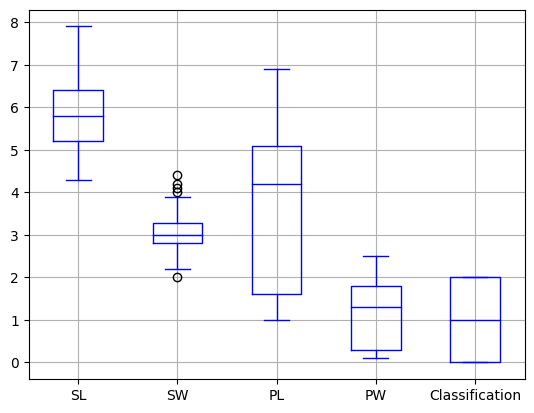

In [11]:
# Check for outliers using boxplot
import matplotlib.pyplot as plt
df.boxplot(color='blue')
plt.show()

In [12]:
### IQR METHOD FOR TREATING OUTLIER ON SW COLUMN
q1 = df['SW'].quantile(0.25)
q3 = df['SW'].quantile(0.75)
iqr = q3 - q1
lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr
df['SW'] = np.where(df['SW'] > upper, upper, df['SW'])
df['SW'] = np.where(df['SW'] < lower, lower, df['SW'])

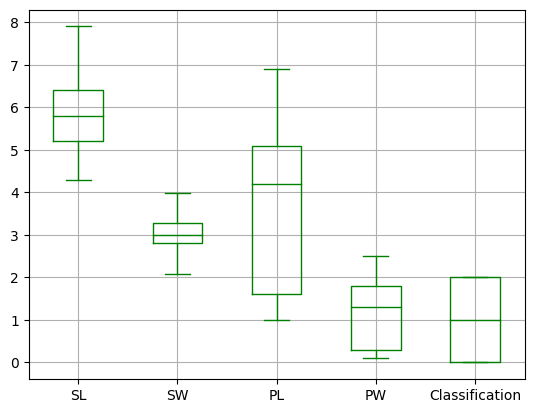

In [13]:
# AFTER IQR
df.boxplot(color='green')
plt.show()

In [14]:
# SCALING  THE DATA
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df.drop('Classification', axis=1))
df_scaled = pd.DataFrame(df_scaled, columns=df.columns[:-1])
df_scaled.head()

,SL,SW,PL,PW
0,-0.938151,1.121412,-1.370138,-1.312977
1,-1.186357,-0.110608,-1.370138,-1.312977
2,0.000000,0.382200,-1.428287,-1.312977
3,-1.558667,0.135796,-1.311989,-1.312977
4,-1.062254,1.367816,-1.370138,-1.312977


In [15]:
# Use concat to combine the scaled data with the 'Classification' column
df_scaled = pd.concat([df_scaled, df['Classification']], axis=1)
# Verify the change
df_scaled.head()

,SL,SW,PL,PW,Classification
0,-0.938151,1.121412,-1.370138,-1.312977,0
1,-1.186357,-0.110608,-1.370138,-1.312977,0
2,0.000000,0.382200,-1.428287,-1.312977,0
3,-1.558667,0.135796,-1.311989,-1.312977,0
4,-1.062254,1.367816,-1.370138,-1.312977,0


In [16]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso,LinearRegression
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

x = df_scaled.drop('Classification', axis=1)
y = df_scaled['Classification']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
# Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)

# Lasso Regression model
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)

# Evaluate the models
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

# Print the evaluation metrics
print(f'Linear Regression MSE: {mse_linear}')
print(f'Linear Regression R²: {r2_linear}')
print(f'Lasso Regression MSE: {mse_lasso}')
print(f'Lasso Regression R²: {r2_lasso}')

Linear Regression MSE: 0.0362622448510102
Linear Regression R²: 0.9481144350303511
Lasso Regression MSE: 0.03860854094543927
Lasso Regression R²: 0.9447572546090695


LOGISTIC REGRESSION

In [17]:
from sklearn.linear_model import LogisticRegression
logit_model = LogisticRegression()
logit_model.fit(X_train,y_train)
y_pred = logit_model.predict(X_test)

In [18]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
print('Accuracy is', accuracy_score(y_test, y_pred))
print('Precision is', precision_score(y_test, y_pred, average='macro'))
print('Recall is', recall_score(y_test, y_pred, average='macro'))
print('f1 score is', f1_score(y_test,y_pred, average='macro'))

Accuracy is 0.9666666666666667
Precision is 0.9722222222222222
Recall is 0.9629629629629629
f1 score is 0.9658994032395567


KNN (k- NEAREST NEIGHBOUR)

In [19]:
from sklearn.neighbors import KNeighborsClassifier
metric_k =[]
neighbors = np.arange(1,25)
for k in neighbors:
  classifier = KNeighborsClassifier(n_neighbors=k, metric='minkowski',p=2)
  classifier.fit(X_train,y_train)
  y_pred = classifier.predict(X_test)
  acc = accuracy_score(y_test,y_pred)
  metric_k.append(acc)

In [20]:
metric_k

[0.9666666666666667,
 0.9666666666666667,
 1.0,
 1.0,
 0.9666666666666667,
 1.0,
 0.9666666666666667,
 1.0,
 0.9666666666666667,
 1.0,
 1.0,
 1.0,
 1.0,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667]

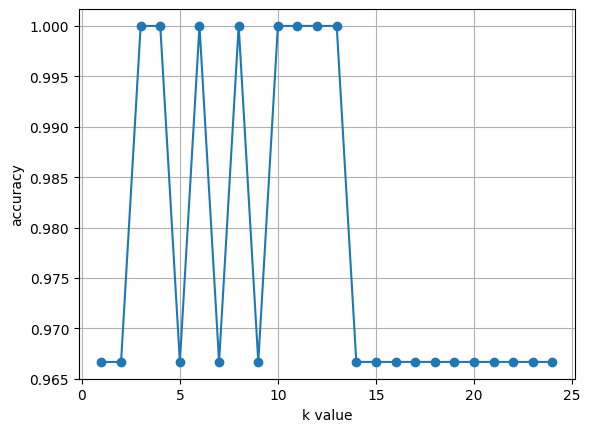

In [21]:
plt.plot(neighbors,metric_k,'o-')
plt.xlabel('k value')
plt.ylabel('accuracy')
plt.grid()

In [22]:
classifier = KNeighborsClassifier(n_neighbors = 10, metric='minkowski',p=2) # from graph we get 5 has more accurate value
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
acc = accuracy_score(y_test,y_pred)
print('Accuracy is', accuracy_score(y_test, y_pred))
print('Precision is', precision_score(y_test, y_pred, average='macro'))
print('Recall is', recall_score(y_test, y_pred, average='macro'))
print('f1 score is', f1_score(y_test,y_pred, average='macro'))

Accuracy is 1.0
Precision is 1.0
Recall is 1.0
f1 score is 1.0


##### SVM


In [23]:
from sklearn.svm import SVC
sv_clf =SVC()
sv_clf.fit(X_train,y_train)
y_pred = sv_clf.predict(X_test)
print('Accuracy is', accuracy_score(y_test, y_pred))
print('Precision is', precision_score(y_test, y_pred, average='macro'))
print('Recall is', recall_score(y_test, y_pred, average='macro'))
print('f1 score is', f1_score(y_test,y_pred, average='macro'))

Accuracy is 0.9666666666666667
Precision is 0.9722222222222222
Recall is 0.9629629629629629
f1 score is 0.9658994032395567


#####   DECESION TREE

In [24]:
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier()
DecisionTreeClassifier()
dt_clf.fit(X_train,y_train)
y_pred = dt_clf.predict(X_test)
print('Accuracy is', accuracy_score(y_test, y_pred))
print('Precision is', precision_score(y_test, y_pred, average='macro'))
print('Recall is', recall_score(y_test, y_pred, average='macro'))
print('f1 score is', f1_score(y_test,y_pred, average='macro'))

Accuracy is 1.0
Precision is 1.0
Recall is 1.0
f1 score is 1.0


RANDOM FOREST

In [25]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train,y_train)
y_pred = rf_clf.predict(X_test)
print('Accuracy is', accuracy_score(y_test, y_pred))
print('Precision is', precision_score(y_test, y_pred, average='macro'))
print('Recall is', recall_score(y_test, y_pred, average='macro'))
print('f1 score is', f1_score(y_test,y_pred, average='macro'))

Accuracy is 1.0
Precision is 1.0
Recall is 1.0
f1 score is 1.0


Hyper parameter tuning

In [26]:
rf_clf1 = RandomForestClassifier(criterion='Entropy',n_estimators=10)
rf_clf1 = RandomForestClassifier()
rf_clf1.fit(X_train,y_train)
y_pred = rf_clf1.predict(X_test)
print('Accuracy is', accuracy_score(y_test, y_pred))
print('Precision is', precision_score(y_test, y_pred, average='macro'))
print('Recall is', recall_score(y_test, y_pred, average='macro'))
print('f1 score is', f1_score(y_test,y_pred, average='macro'))

Accuracy is 1.0
Precision is 1.0
Recall is 1.0
f1 score is 1.0


KNN, Decision Tree and Random forest are the best models with accuracy 1 , and therefore the best model is the one with the highest accuracy score on the test set, which indicates it is the most effective at predicting the iris species based on the provided features.